# 11ª COMPETIÇÃO DE MACHINE LEARNING FLAI

[Detalhes da competição](https://drive.google.com/file/d/1RvP11zi87wltI4pQytpz4GZxIHCe5AT8/view)

## Importando bibliotecas

### Bibliotecas comuns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Bibliotecas para pré-processamento

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

### Bibliotecas para balanceamento

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, AllKNN, NearMiss

### Bibliotecas dos modelos Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
# Validação
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

#Tunagem
from sklearn.model_selection import GridSearchCV

### Biblioteca das métricas

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

## Importando conjunto de dados

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/EvelyneBomfim/Challenge-Aprovacao_de_emprestimo/main/treino.csv')
print ('Conjunto de dados possui {} linhas.'.format(dados.shape[0]))

Conjunto de dados possui 3300 linhas.


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cliente       3300 non-null   object 
 1   Empréstimo    3300 non-null   float64
 2   ValorDoBem    3300 non-null   float64
 3   Finalidade    3300 non-null   object 
 4   Emprego       3300 non-null   object 
 5   TempoEmprego  3122 non-null   float64
 6   Negativos     3122 non-null   float64
 7   Atrasos       3198 non-null   float64
 8   TempoCliente  3300 non-null   float64
 9   LC-Recente    3300 non-null   float64
 10  LC-Atual      3300 non-null   float64
 11  RDS           2647 non-null   object 
dtypes: float64(8), object(4)
memory usage: 309.5+ KB


## Ajustando formato das colunas

In [ ]:
# Função para remover o % da coluna RDS e transformar de string para float

def ajustar_RDS(dataset):
  for i in dataset.index:
    if type(dataset['RDS'][i])!=float:
      dataset['RDS'][i] = float(dataset['RDS'][i][:-1]);

In [ ]:
# Função para substituir os valores da coluna Cliente
  # Bom pagador: 0 / Mau pagador: 1

def converter_cliente(dataset):
  cliente = {'bom pagador': 0,
             'mau pagador': 1}
  dataset['Cliente'] = dataset['Cliente'].map(cliente)

In [ ]:
ajustar_RDS(dados)
converter_cliente(dados)

<ipython-input-156-41aa0996752b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RDS'][i] = float(dataset['RDS'][i][:-1]);


## Análise de dados

In [ ]:
dados.head()

,Cliente,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,0,19468.0,309447.00,Reforma,Outros,0.50,0.0,1.0,185.6,0.0,33.0,39.2
1,0,91688.0,449020.00,Diversas,Outros,15.25,0.0,0.0,234.5,1.0,41.0,NaN
2,0,34226.0,164394.70,Reforma,Outros,1.25,0.0,0.0,250.5,0.0,10.0,37.2
3,0,48356.0,270592.64,Diversas,Outros,2.25,1.0,0.0,230.4,3.0,26.0,29.0
4,0,64684.0,78167.16,Diversas,Professional,3.75,0.0,0.0,93.6,0.0,18.0,21.0


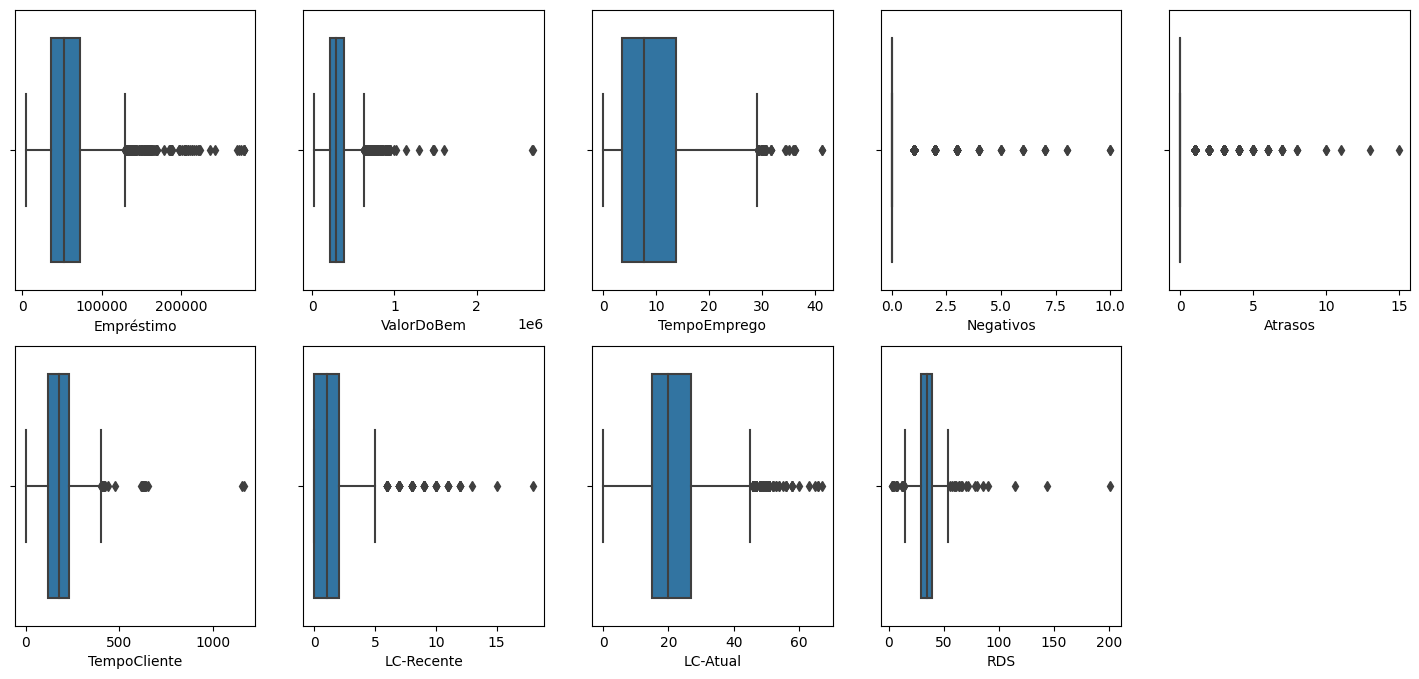

In [ ]:
# Plotando as colunas quantitativas
nome_colunas = ['Empréstimo', 'ValorDoBem', 'TempoEmprego', 'Negativos', 'Atrasos', 'TempoCliente', 'LC-Recente', 'LC-Atual', 'RDS']
total_colunas = len(nome_colunas)
fig =plt.figure(figsize=(18,8))
grafico=0
X = [(2,5,1), (2,5,2), (2,5,3), (2,5,4), (2,5,5), (2,5,6), (2,5,7), (2,5,8), (2,5,9)]

for nrows, ncols, plot_number in X:
  sub = fig.add_subplot(nrows, ncols, plot_number)
  sns.boxplot(x=nome_colunas[grafico], data=dados)
  grafico+=1

plt.show()


### Outliers

Vemos nos gráficos acima alguns outliers. Porém, alguns gráficos se destacam mais. Como: TempoCliente e RDS.

In [ ]:
dados[dados['TempoCliente']>1000]

,Cliente,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
2085,1,60602.0,495520.26,Diversas,Outros,3.00,0.0,0.0,1170.2,0.0,0.0,40.2
2968,1,52752.0,488270.00,Diversas,Outros,3.75,0.0,0.0,1156.2,0.0,0.0,NaN


Cliente com mais de 1000 meses? (91 anos)

In [ ]:
dados.drop(dados[dados['TempoCliente']>1000].index, inplace=True)

In [ ]:
dados[dados['RDS']>=100]

,Cliente,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
956,1,73162.0,416401.68,Diversas,Comissionado,1.75,0.0,NaN,123.2,0.0,19.0,201.3
2170,1,117122.0,270580.08,Reforma,Autônomo,2.50,0.0,6.0,238.1,2.0,27.0,115.1
2292,1,205670.0,911350.46,Diversas,Professional,2.50,0.0,0.0,101.7,1.0,20.0,144.2


RDS é a porcentagem do salário anual com o débito. Seria possível existir acima de 100% ?

In [ ]:
dados.drop(dados[dados['RDS']>=100].index, inplace=True)

In [ ]:
dados.reset_index(inplace=True)

### Variáveis de tempo

As colunas TempoEmprego, TempoCliente e LC-Recente referem-se a tempo (meses ou anos). Para melhor análise, todos serão convertidos a mesma medida. No caso, em anos.

In [ ]:
# TempoEmprego já equivale ao tempo em anos, sem necessidade de alteração 

In [ ]:
# TempoCliente é o tempo do cliente na instituição em meses

dados['TempoCliente'] = (dados['TempoCliente'] / 12).round(2)

In [ ]:
# LC-Recente é a quantidade de linhas de crédito nos últimos 2 anos. Será convertida para média nos ultimos anos

dados['LC-Recente'] = (dados['LC-Recente'] / 2).round(2)

## Normalização dos dados

Normalizando as colunas categóricas

In [ ]:
colunas_cat = ['Finalidade','Emprego']
dados_dummies = pd.get_dummies(dados[colunas_cat])

Normalizando as colunas numéricas para melhor entendimento do modelo

In [ ]:
colunas_num = ['Empréstimo','ValorDoBem','TempoEmprego','Negativos','Atrasos','TempoCliente','LC-Recente','LC-Atual','RDS']

In [ ]:
MinMax = MinMaxScaler()

MinMax.fit(dados[colunas_num])

dados_normalizado = MinMax.transform(dados[colunas_num])
dados_normalizado = pd.DataFrame(dados_normalizado, columns=colunas_num)

## Dados faltantes

In [ ]:
dados_normalizado.isna().sum()

Empréstimo        0
ValorDoBem        0
TempoEmprego    178
Negativos       178
Atrasos         101
TempoCliente      0
LC-Recente        0
LC-Atual          0
RDS             652
dtype: int64

Será usado o modelo KNN para substituir os valores NaN, com base no próprio dataset considerando os valores não nulos

In [ ]:
# Selecionando apenas os dados completos (sem NaN)
dados_nn = dados_normalizado[colunas_num].copy()
dados_nn.dropna(inplace=True)

# Selecionando as linhas com valores NaN (seja um ou mais)
dados_na = dados_normalizado[dados_normalizado.isna().any(axis=1)][colunas_num]
indices_dados_na = dados_na.index

In [ ]:
# Treinando e predizendo os dados faltantes
knn = KNNImputer()

knn.fit(dados_nn)

faltantes_knn = knn.fit_transform(dados_na)
faltantes_knn = pd.DataFrame(faltantes_knn, columns=colunas_num, index=indices_dados_na)

<Axes: xlabel='RDS', ylabel='Count'>

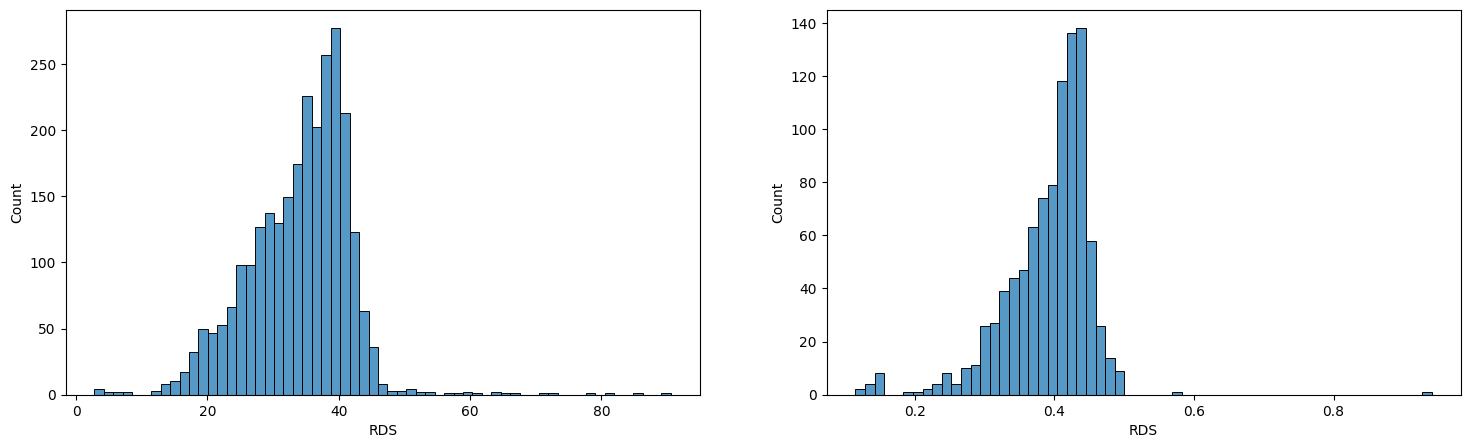

In [ ]:
# Analisando a coluna RDS do conjunto e os dados obtidos pelo KNN

fig = plt.figure(figsize=(18, 5))

# Conjunto de dados original
ax1 = fig.add_subplot(121)
sns.histplot(x='RDS', data=dados)

# Dados faltantes obtidos pelo KNN
ax2 = fig.add_subplot(122)
sns.histplot(x='RDS', data=faltantes_knn)

### Juntando dataset
Colunas categóricas e colunas numéricas já normalizados e sem dados faltantes

In [ ]:
dados_MinMax = pd.concat([faltantes_knn,dados_nn]).sort_index()

dataset = dados_dummies.join(dados_MinMax)
dataset.head()

,Finalidade_Diversas,Finalidade_Reforma,Emprego_Autônomo,Emprego_Comissionado,Emprego_Geral,Emprego_Gerente,Emprego_Outros,Emprego_Professional,Empréstimo,ValorDoBem,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,0,1,0,0,0,0,1,0,0.053714,0.106792,0.012121,0.0,0.066667,0.283607,0.000000,0.484848,0.414579
1,1,0,0,0,0,0,1,0,0.316571,0.159215,0.369697,0.0,0.000000,0.358658,0.055556,0.606061,0.446469
2,0,1,0,0,0,0,1,0,0.107429,0.052311,0.030303,0.0,0.000000,0.383367,0.000000,0.136364,0.391800
3,1,0,0,0,0,0,1,0,0.158857,0.092199,0.054545,0.1,0.000000,0.352388,0.166667,0.378788,0.298405
4,1,0,0,0,0,0,0,1,0.218286,0.019924,0.090909,0.0,0.000000,0.142172,0.000000,0.257576,0.207289


## Funções

In [ ]:
def comparar_modelo_balanc(X, y, modelo_balanceamento, nome_balanceamento, modelo_ML):

  col_index = ['Cliente 0', 'Cliente 1', 'Acuracia', 'Precisao', 'Recall', 'F1']
  dic = {}

  for i in range(len(modelo_balanceamento)):
  
    X_bal, y_bal = modelo_balanceamento[i].fit_resample(X,y)
    y0 = len(y_bal[y_bal==0])
    y1 = len(y_bal[y_bal==1])

    X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=SEED)

    modelo_ML.fit(X_train, y_train)
    y_pred = modelo_ML.predict(X_test)

    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    dic[nome_balanceamento[i]] = [y0, y1, acuracia, precisao, recall,  f1]

    resultados = pd.DataFrame(dic, index = col_index).T

  return resultados.sort_values(by='F1', ascending=False)

In [ ]:
def analisar_modelo(X, y, modelo_balanceamento, modelo_ML, nome_grafico):

  # Balanceamento dos dados
  X_bal, y_bal = modelo_balanceamento.fit_resample(X, y)

  # Separando os dados
  X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)

  # Treinando os dados
  modelo_ML.fit(X_train, y_train)
  y_pred = modelo_ML.predict(X_test)

  # Cálculo da curva ROC
  fpr, tpr, _ = roc_curve(y_test,  y_pred)
  
  # Gráficos
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

  # Comparando predições de clientes
  cliente_verdadeiro = ax1.scatter(X['RDS'], y, s=20, label="Samples", marker="x", c='#d62728') # Clientes verdadeiros
  cliente_predito = ax1.scatter(X_test['RDS'], y_pred, s=10, label="Predito", marker="*", c='#1f77b4') # Clientes preditos
  ax1.legend([cliente_verdadeiro, cliente_predito],['Clientes verdadeiros', 'Clientes preditos'])
  ax1.set_title("Predições")
  ax1.set_ylabel("Clientes")
  ax1.set_xlabel("RDS")

  # Curva ROC
  ax2.plot(fpr,tpr)
  ax2.set_title("ROC")
  ax2.set_ylabel("Sensibilidade")
  ax2.set_xlabel("Precisão")
  ax2.text(.6, .6, f"ROC AUC Score: {roc_auc_score(y_test,y_pred):.2f}")
  ax2.text(.6, .55, f"Precision: {precision_score(y_test, y_pred):.2f}")
  ax2.text(.6, .5, f"Recall: {recall_score(y_test, y_pred):.2f}")

  plt.suptitle(nome_grafico)
  plt.show()

In [ ]:
def comparar_modelo_ML(X, y, modelo_ML, nome_modelo):

  col_index = ['Acuracia', 'Precisao', 'Revocacao', 'F1']
  dic = {}

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

  for i in range(len(modelo_ML)):

    modelo_ML[i].fit(X_train, y_train)
    y_pred = modelo_ML[i].predict(X_test)

    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    revocacao = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)

    dic[nome_modelo[i]] = [acuracia, precisao, revocacao, f1]

    resultados = pd.DataFrame(dic, index = col_index).T

  return resultados.sort_values(by='F1', ascending=False)

In [ ]:
def validar_ml(X, y, nome_dos_modelos, lista_de_modelos, validacao):
  metricas = ['accuracy', 'precision', 'recall', 'f1']
  dic = {}
  
  for i in range(len(lista_de_modelos)):
      cv = cross_validate(estimator=lista_de_modelos[i],
                          X=X,
                          y=y,
                          cv = validacao,
                          scoring = metricas)

      acc = cv['test_accuracy'].mean()
      sen = cv['test_recall'].mean()
      vpp = cv['test_precision'].mean()
      f1 = cv['test_f1'].mean()

      dic[nome_dos_modelos[i]] = [acc, sen, vpp, f1]
      
  resultados = pd.DataFrame(dic, index = metricas).T

  return resultados.sort_values(by='f1', ascending=False)

## Balanceamento do modelo

### Métodos para comparação

In [ ]:
SEED = 42

# Oversampling
ros = RandomOverSampler(random_state=SEED)
sm = SMOTE(random_state=SEED)
ada = ADASYN(random_state=SEED)

# Undersampling
rus = RandomUnderSampler(random_state=SEED)
cnn = CondensedNearestNeighbour(random_state=SEED)
aknn = AllKNN()
nm = NearMiss()

### Comparando os balanceamentos
Irei comparar cada balanceamento utilizando o modelo RandomForest como padrão.

In [ ]:
modelo_balanc = [ros, sm, ada, rus, cnn, aknn, nm]
nome_balanc = ['RandomOverSampler', 'SMOTE', 'ADASYN', 'RandomUnderSampler', 'CondensedNearestNeighbour', 'AllKNN', 'NearMiss']
rfc = RandomForestClassifier()
X = dataset
y = dados['Cliente']

In [ ]:
comparar_modelo_balanc(X, y, modelo_balanc, nome_balanc, rfc)

,Cliente 0,Cliente 1,Acuracia,Precisao,Recall,F1
RandomOverSampler,2686.0,2686.0,0.979529,0.963899,0.996269,0.979817
ADASYN,2686.0,2772.0,0.949328,0.935522,0.966102,0.950566
SMOTE,2686.0,2686.0,0.941687,0.927711,0.957711,0.942472
NearMiss,609.0,609.0,0.852459,0.829545,0.858824,0.843931
RandomUnderSampler,609.0,609.0,0.836066,0.819767,0.829412,0.824561
CondensedNearestNeighbour,335.0,609.0,0.704225,0.733010,0.838889,0.782383
AllKNN,2613.0,609.0,0.892451,0.940594,0.492228,0.646259


Os modelos Oversample se destacaram mais que os Undersampling. Nesse caso, irei analisar alguns para decidir qual o mais interessante para o modelo machine learning.

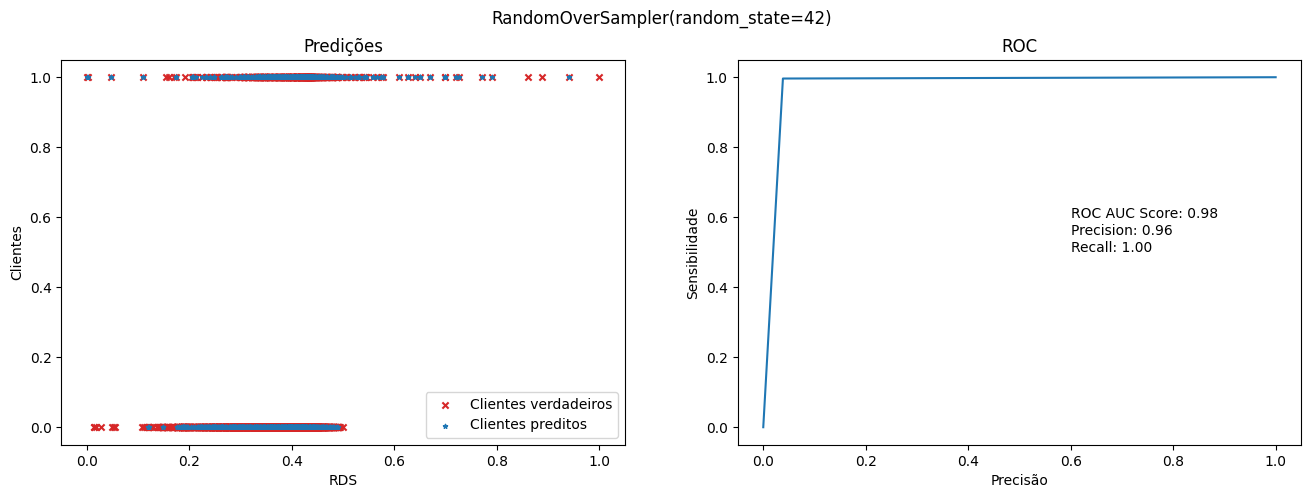

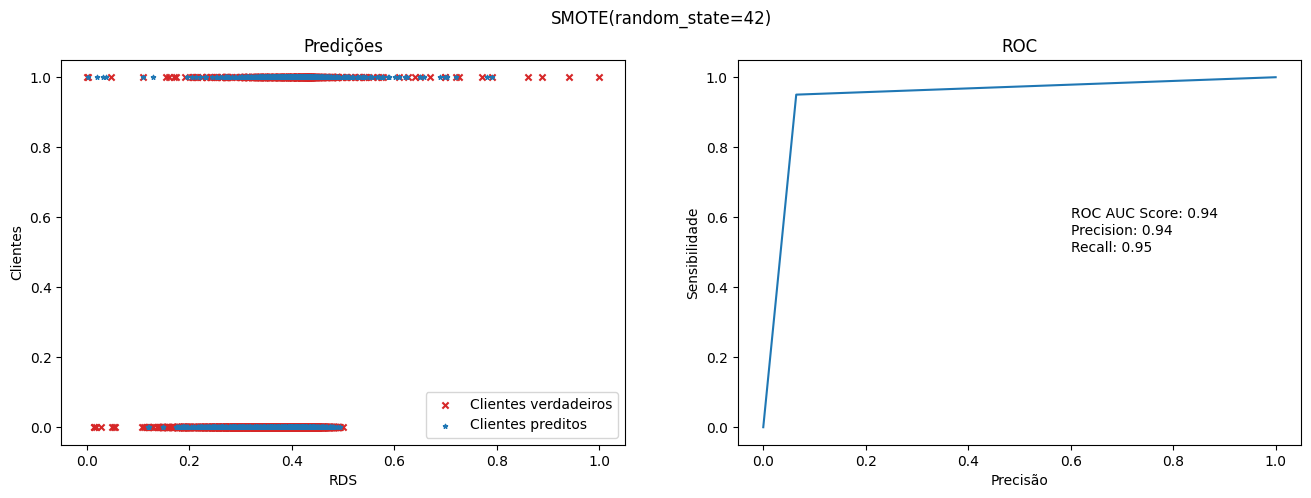

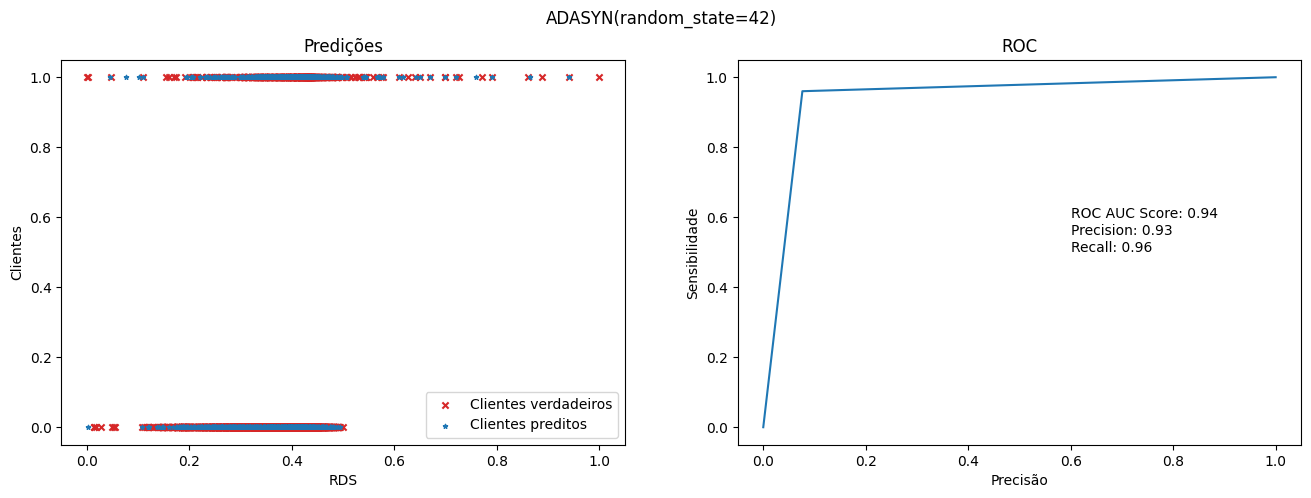

In [ ]:
lista_balanceamento = [ros,sm,ada]

for balanceamento in lista_balanceamento:
  analisar_modelo(X, y, balanceamento, rfc, str(balanceamento))

Usando apenas o RandomForestClassifier como modelo de ML para comparar com diferentes balanceamentos. 

- Apesar do Random Over Sampling ter obtido a melhor métrica, analisando suas predições, aparenta ter overfitting.
- O SMOTE apresenta bastante acertos, porém quando os clientes com RDS mais distintos, possui dificuldade de predizer.
- Já o ADASYN, mesmo não obtendo a melhor métrica da comparação, aparenta ter aprendido mais o conjunto de dados e a relação do cliente com o RDS.

#### Dataset balanceado

In [ ]:
X_bal, y_bal = ada.fit_resample(X, y)

## Modelos ML

### Biblioteca de modelos

In [ ]:
svc = SVC(random_state=SEED)
lr = LogisticRegression(random_state=SEED)
dtc = DecisionTreeClassifier(random_state=SEED)
KNN = KNeighborsClassifier()
gNB = GaussianNB()
rfc = RandomForestClassifier(random_state=SEED)
bc = BaggingClassifier(random_state=SEED)
gbc = GradientBoostingClassifier(random_state=SEED)
abc = AdaBoostClassifier(random_state=SEED)

### Comparando modelos

In [ ]:
modelos_ML = [svc, lr, dtc, KNN, gNB, rfc, bc, gbc, abc]
nome_ML = ['SVC', 'LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB',
           'RandomForestClassifier', 'BaggingClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier']

In [ ]:
comparar_modelo_ML(X_bal, y_bal, modelos_ML, nome_ML)

,Acuracia,Precisao,Revocacao,F1
KNeighborsClassifier,0.943834,0.923788,0.968523,0.945626
RandomForestClassifier,0.938339,0.925969,0.953995,0.939773
BaggingClassifier,0.905983,0.912776,0.899516,0.906098
DecisionTreeClassifier,0.877289,0.880633,0.875303,0.877960
GradientBoostingClassifier,0.859585,0.859903,0.861985,0.860943
AdaBoostClassifier,0.824786,0.835616,0.812349,0.823818
SVC,0.743590,0.727578,0.785714,0.755530
LogisticRegression,0.736874,0.728853,0.761501,0.744819
GaussianNB,0.663004,0.760456,0.484262,0.591716


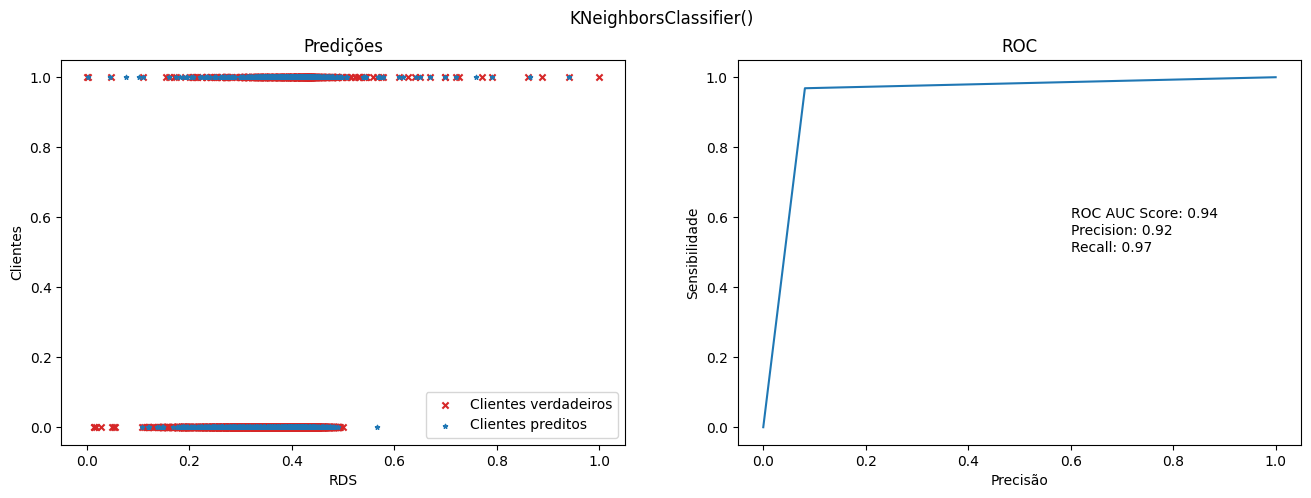

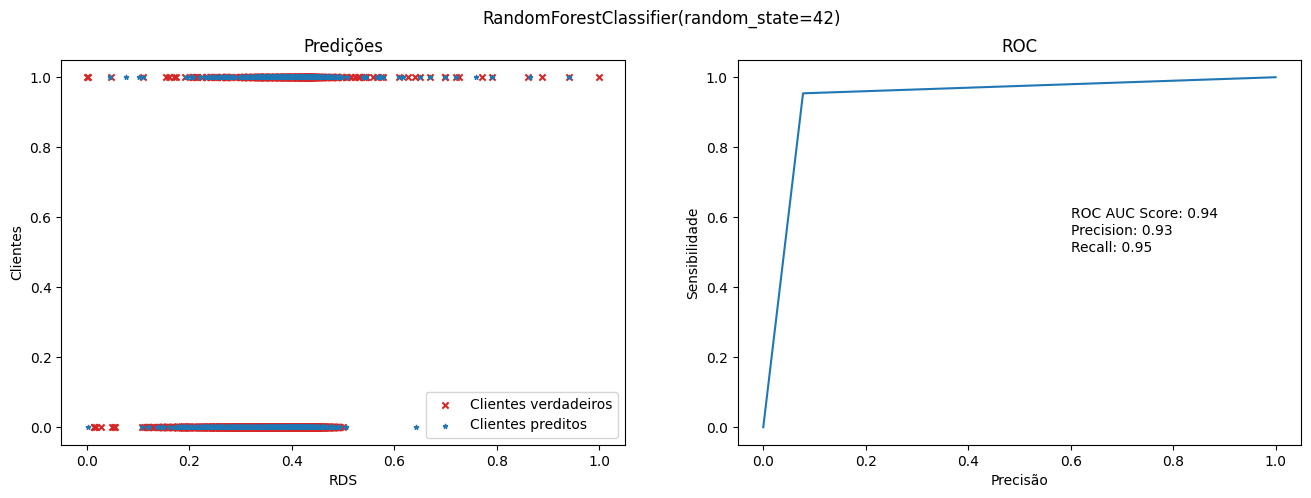

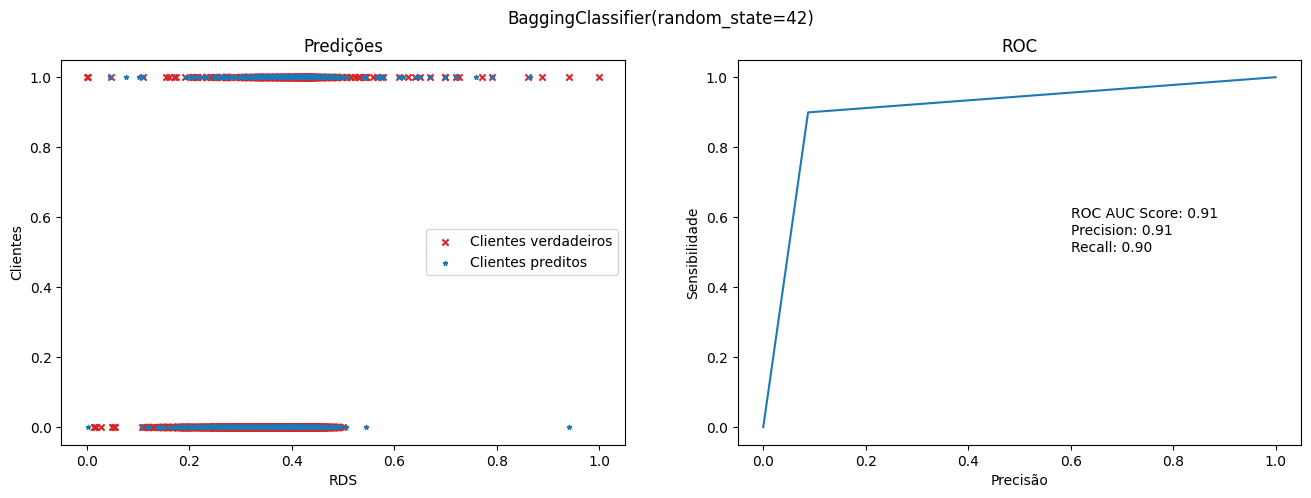

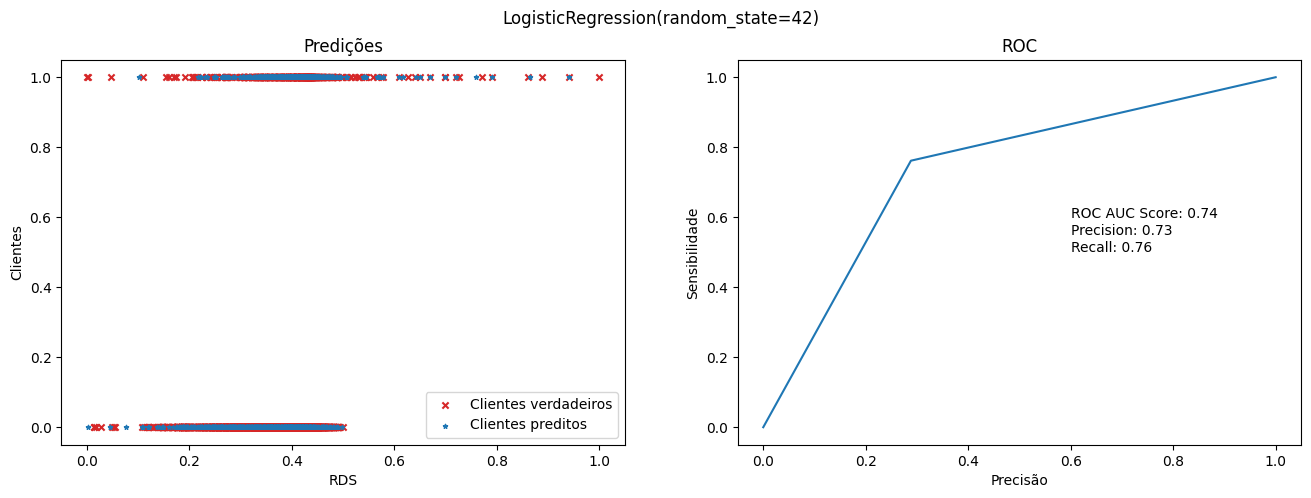

In [ ]:
lista_ML = [KNN, rfc, bc, lr]

for ml in lista_ML:
  analisar_modelo(X, y, ada, ml, str(ml))

### Validação

In [ ]:
lista_modelos = [rfc, bc, dtc, KNN]
nome_modelos = ['RandomForestClassifier', 'BaggingClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier']
validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10)

In [ ]:
validar_ml(X_bal, y_bal, nome_modelos, lista_modelos, validacao)

,accuracy,precision,recall,f1
KNeighborsClassifier,0.961634,0.974927,0.950906,0.962721
RandomForestClassifier,0.955991,0.959884,0.953875,0.956826
BaggingClassifier,0.926402,0.909850,0.943310,0.926221
DecisionTreeClassifier,0.887450,0.887919,0.890380,0.889037


# Seleção de colunas

In [ ]:
variaveis = pd.DataFrame()

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=SEED)

rfc.fit(X_train, y_train)
variaveis['Coluna'] = X_train.columns
variaveis['Importância'] = rfc.feature_importances_
variaveis.sort_values(by = 'Importância', ascending = False, inplace = True)

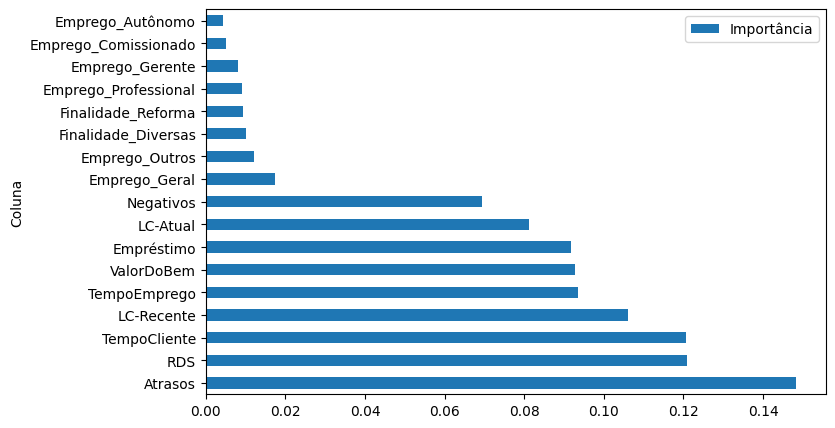

In [ ]:
variaveis_graph =  variaveis.copy()
variaveis_graph.set_index('Coluna', inplace = True)
variaveis_graph.plot(kind='barh', figsize=(8, 5));

In [ ]:
validar_ml(X_bal, y_bal, nome_modelos, lista_modelos, validacao)

,accuracy,precision,recall,f1
KNeighborsClassifier,0.961048,0.974494,0.950269,0.962165
RandomForestClassifier,0.956119,0.959993,0.953990,0.956948
BaggingClassifier,0.927593,0.910861,0.944674,0.927400
DecisionTreeClassifier,0.889098,0.885930,0.894844,0.890278


In [ ]:
validar_ml(X_bal[['TempoCliente','RDS','Atrasos']], y_bal, nome_modelos, lista_modelos, validacao)

,accuracy,precision,recall,f1
RandomForestClassifier,0.757860,0.756998,0.764219,0.760443
BaggingClassifier,0.745182,0.714538,0.767856,0.740099
KNeighborsClassifier,0.724515,0.717894,0.734280,0.725759
DecisionTreeClassifier,0.718194,0.722763,0.722621,0.722562


In [ ]:
validar_ml(X_bal[['TempoCliente','RDS']], y_bal, nome_modelos, lista_modelos, validacao)

,accuracy,precision,recall,f1
RandomForestClassifier,0.675358,0.678610,0.681048,0.679632
BaggingClassifier,0.662991,0.628502,0.682792,0.654429
DecisionTreeClassifier,0.645656,0.640983,0.654241,0.647411
KNeighborsClassifier,0.633088,0.658442,0.633606,0.645648


In [ ]:
validar_ml(X_bal[['RDS']], y_bal, nome_modelos, lista_modelos, validacao)

Selecionando as colunas para comparação, não houve melhora nas métricas.

# Tunagem

Testarei algumas possibilidades de parâmetros para melhorar a performance dos modelos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=SEED)

In [ ]:
rfc = RandomForestClassifier()
metricas = ['accuracy', 'precision', 'recall', 'f1']
parametros = {
    'n_estimators': [50,100,150,200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5,10,50],
    'min_samples_split': [1,2,3,4,5],
    'min_samples_leaf': [1,3,5],
    'bootstrap': [True,False]
}

In [ ]:
grid = GridSearchCV(rfc, parametros, scoring='f1')

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 50],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [ ]:
print(grid.best_estimator_)
print(grid.best_score_)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=50,
                       n_estimators=150)
0.9536544505054705


Testando com KNeighborsClassifier

In [ ]:
parametro_knn = {
    'n_neighbors': [3,5,7,10,20,30,50],
    'weights': ['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [-1]
}

In [ ]:
knc = KNeighborsClassifier()
grid = GridSearchCV(knc, parametro_knn, scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 10, 20, 30, 50],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
print(grid.best_estimator_)
print(grid.best_score_)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')
0.969430313809705


Comparando modelos de acordo com os parâmetros encontrados

In [ ]:
lista_modelos = [RandomForestClassifier(),
                 RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=3,n_estimators=50),
                 RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=50,min_samples_split=3),
                 KNeighborsClassifier(),
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')]

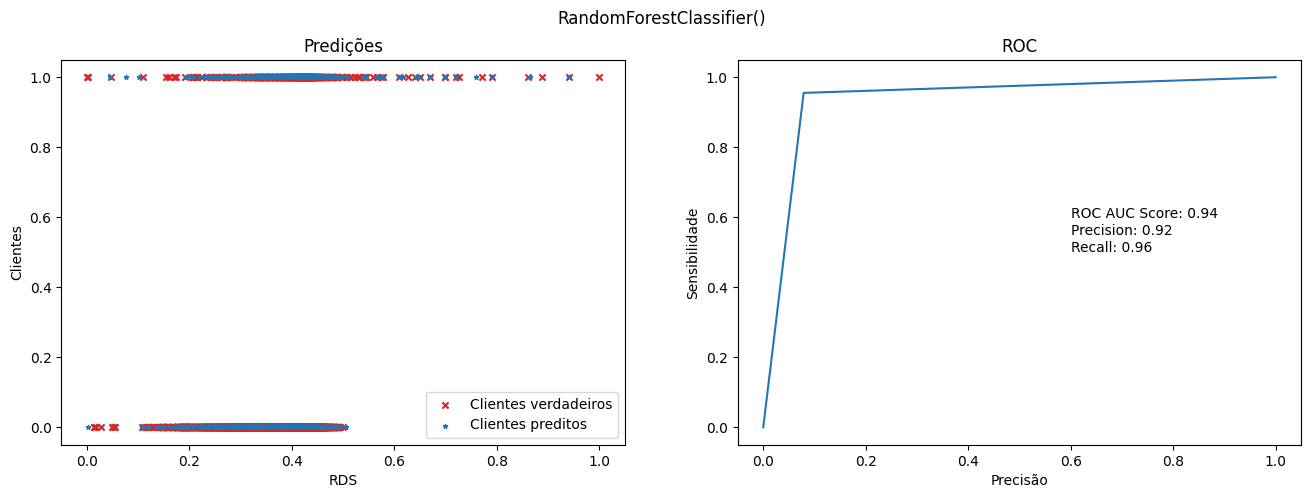

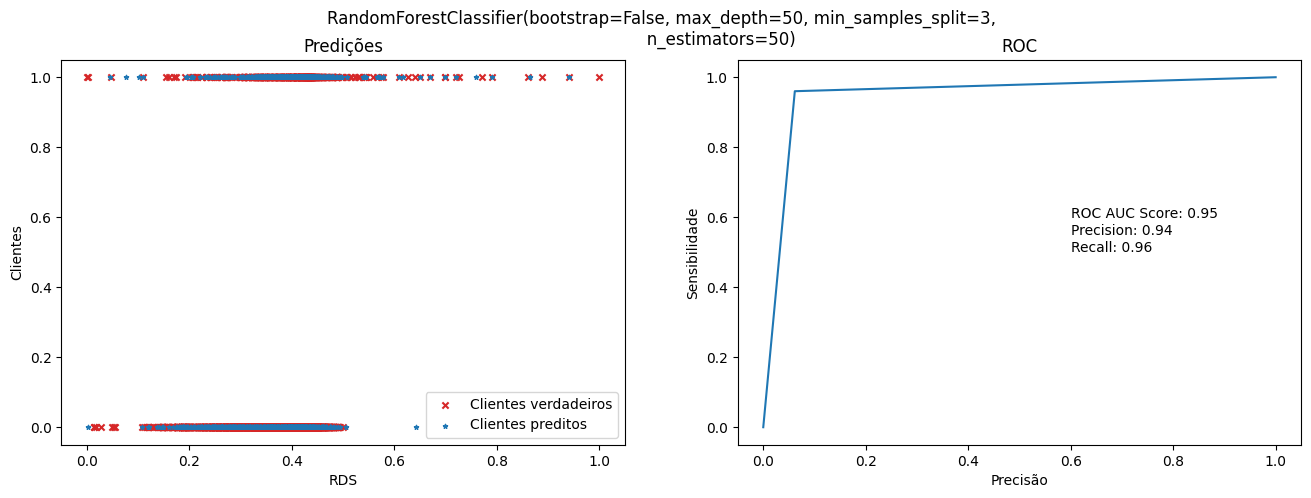

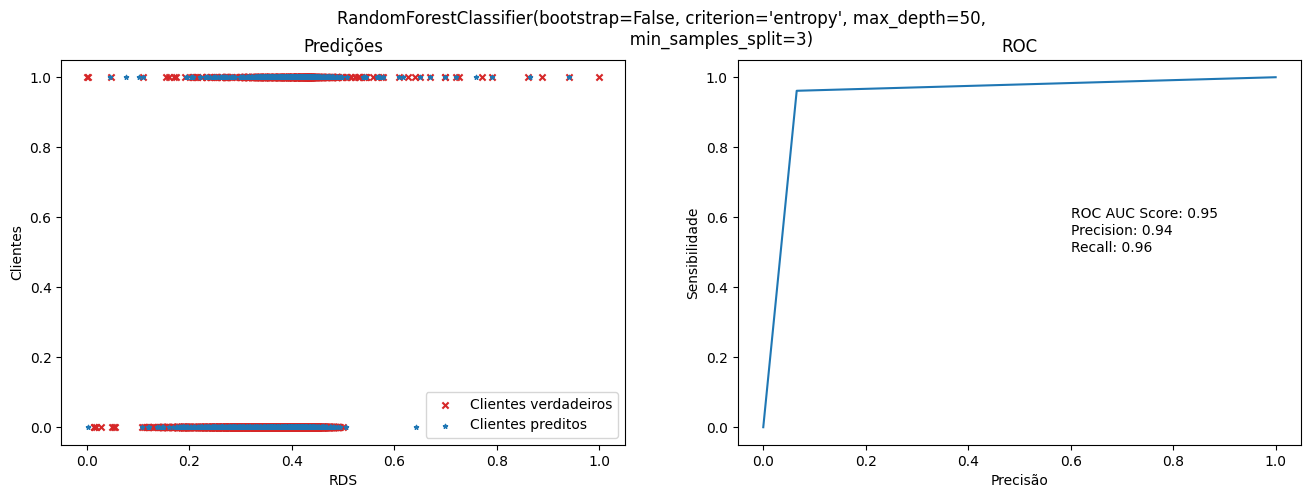

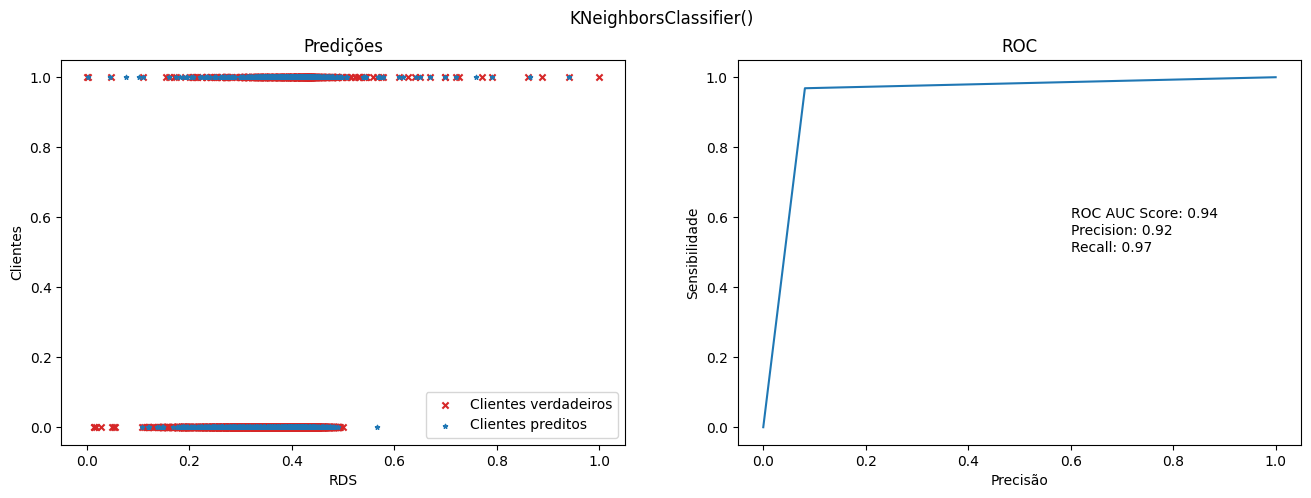

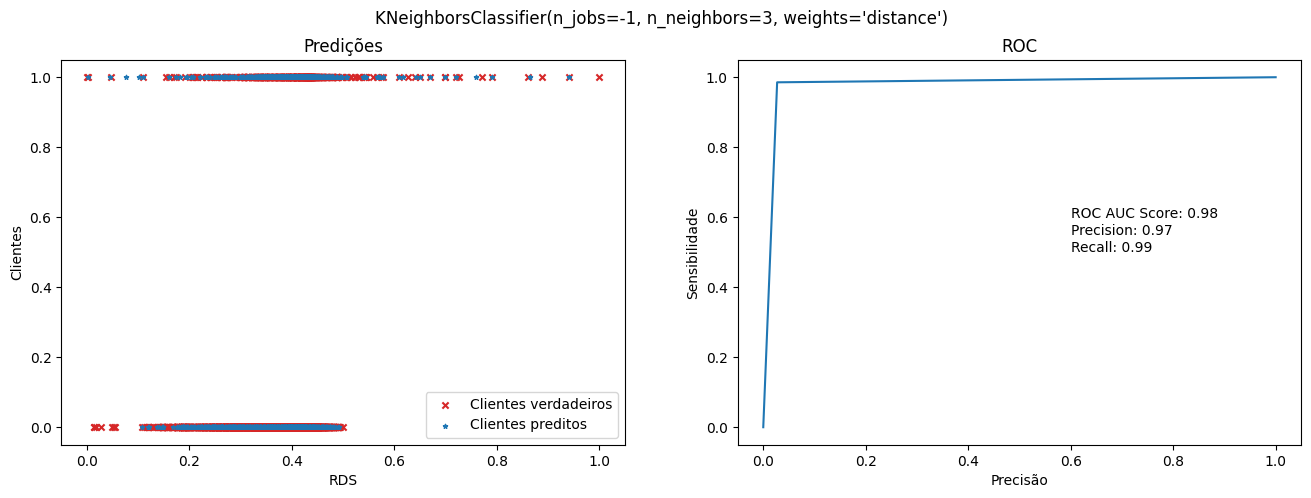

In [ ]:
for modelo in lista_modelos:
  analisar_modelo(X,y,ada,modelo,str(modelo))

# Submissão

Para submissão da competição serão utilizados os dois modelos com maior métrica.

In [ ]:
submissao = pd.read_csv('https://raw.githubusercontent.com/EvelyneBomfim/Challenge-Aprovacao_de_emprestimo/main/teste.csv')
print ('Conjunto de submissao possui {} linhas.'.format(submissao.shape[0]))

In [ ]:
submissao.head()

In [ ]:
ajustar_RDS(submissao)

In [ ]:
submissao['LC-Recente'] = (submissao['LC-Recente'] / 2).round(2)
submissao['TempoCliente'] = (submissao['TempoCliente'] / 12).round(2)

In [ ]:
colunas = ['Empréstimo','ValorDoBem','TempoEmprego','Negativos','Atrasos','TempoCliente','LC-Recente','LC-Atual','RDS']
MinMax.fit(dados[colunas])
submissao_normalizado = MinMax.transform(submissao[colunas])
submissao_normalizado = pd.DataFrame(submissao_normalizado, columns=colunas)

In [ ]:
# Selecionando apenas os dados completos (sem NaN)
sub_nn = submissao_normalizado[colunas].copy()
sub_nn.dropna(inplace=True)

# Selecionando as linhas com valores NaN (seja um ou mais)
sub_na = submissao_normalizado[submissao_normalizado.isna().any(axis=1)][colunas]
indices_sub_na = sub_na.index

In [ ]:
knn = KNNImputer()

knn.fit(dados_nn)

faltantes_sub = knn.fit_transform(sub_na)
faltantes_sub = pd.DataFrame(faltantes_sub, columns=colunas, index=indices_sub_na)

In [ ]:
colunas = ['Finalidade','Emprego']

submissao_dummies = pd.get_dummies(submissao[colunas])

In [ ]:
submissao_MinMax = pd.concat([faltantes_sub,sub_nn]).sort_index()
dataset_submissao = submissao_dummies.join(submissao_MinMax)
dataset_submissao.head()

In [ ]:
# Modelo 01
rfc = RandomForestClassifier()
rfc = RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=3,n_estimators=50)
rfc.fit(X_ros,y_ros)
y_pred = rfc.predict(dataset_submissao)

In [ ]:
# Modelo 02
knc = KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')
knc.fit(X_ada,y_ada)
y_pred = knc.predict(dataset_submissao)

In [ ]:
submissao = pd.DataFrame()
submissao['Cliente'] = y_pred
submissao['Cliente'] = submissao['Cliente'].map({1: 'mau pagador', 0: 'bom pagador'}) 
submissao

In [ ]:
submissao.to_csv('submissão.csv', index = False)